In [36]:
import pandas as pd

# Carregar o arquivo Excel
df = pd.read_excel('desistencia.xlsx')

# Exibir apenas os nomes das colunas

df.head(5)

,hora_de_criação_x,hora_da_modificação_x,proprietário_do_matrícula,proprietário_do_matrícula_name,aluno,data_de_desistência_do_curso,estágio,nota_final,processo_seletivo_x,turma,...,acesso_a_computador_e_internet?,identificação_com_lgbtqiapn+?,imigrante/refugiado?,segurança_alimentar,situação_de_emprego_atual,vítima_de_violência_doméstica?,aluno_certificações,outras_certificações,deficiencia,ifood
0,27/11/2024 13:11,20/02/2025 06:42,5288345000000365568,Administrador EdN,5.288345e+18,18/02/2025,Desistência,NaN,5.288345e+18,5.288345e+18,...,"Sim, em casa",Não,Não,Tenho acesso constante e seguro a alimentos nu...,Empregado em tempo integral,Não,NaN,NaN,Sim,0.0
1,17/12/2024 10:43,21/02/2025 05:44,5288345000000365568,Administrador EdN,5.288345e+18,19/02/2025,Desistência,NaN,NaN,5.288345e+18,...,"Sim, em casa",Não,Não,"Posso obter alimentos suficientes, mas não são...",Desempregado e procurando emprego,Não,AWS Certified Cloud Practitioner,Certificado de Participação - XXXIII Congresso...,Sim,0.0
2,22/01/2025 05:21,21/02/2025 14:33,5288345000000365568,Administrador EdN,5.288345e+18,21/02/2025,Desistência,NaN,5.288345e+18,5.288345e+18,...,"Sim, em casa",Não,Não,Tenho acesso constante e seguro a alimentos nu...,Empregado em tempo integral,Não,NaN,"null, Técnico em Administração, Suporte em Inf...",Sim,0.0
3,27/11/2024 13:12,24/02/2025 13:32,5288345000000365568,Administrador EdN,5.288345e+18,22/02/2025,Desistência,NaN,5.288345e+18,5.288345e+18,...,"Sim, em casa",Não,NaN,Tenho acesso constante e seguro a alimentos nu...,Empregado em tempo integral,Não,NaN,NaN,Sim,0.0
4,19/02/2025 05:33,25/02/2025 07:08,5288345000000365568,Administrador EdN,5.288345e+18,24/02/2025,Desistência,NaN,5.288345e+18,5.288345e+18,...,Sim. em casa,Não,NaN,Tenho acesso constante e seguro a alimentos nu...,Desempregado e procurando emprego,Não,NaN,NaN,Sim,0.0


In [29]:
print(df.columns.tolist())

['hora_de_criação_x', 'hora_da_modificação_x', 'proprietário_do_matrícula', 'proprietário_do_matrícula_name', 'aluno', 'data_de_desistência_do_curso', 'estágio', 'nota_final', 'processo_seletivo_x', 'turma', 'criado_por_x', 'opção_de_sair_do_e-mail_x', 'hora_da_última_atividade_x', 'modificado_por_x', 'motivo_da_reprovação', 'at_-_aulas_ausentes', 'at_-_aulas_presentes', 'at_-_frequência_(%)', 'at_-_última_aula_realizada', 'motivo_da_desistência', 'pc_-_aulas_ausentes', 'pc_-_aulas_presentes', 'pc_-_frequência_(%)', 'pc_-_última_aula_realizada', 'pc_-_total_de_aulas_realizadas', 'at_-_total_de_aulas_realizadas', 'tipo_de_comunicação', 'ciclo', 'aluno_destaque', 'justificativa_comunicação', 'observações', 'aws_certified_cloud_practitioner', 'data_de_resultado', 'data_do_agendamento', 'reprovação_laboratório', 'reprovação_por_falta', 'criar_empregabilidade', 'nota_do_exame_final_aws', 'tipo_de_bolsa', 'tipo_de_matricula', 'hora_de_criação_y', 'em_processo_seletivo', 'idade', 'hora_da_mod

In [37]:
# Filtrar só as linhas com estágio "Desistiu" ou "Desistência" e remover ano 2026
df_filtrado = df[
    (df['estágio'].isin(['Desistiu', 'Desistência'])) &
    (pd.to_datetime(df['data_de_desistência_do_curso']).dt.year != 2026)
].copy()

# Converter para datetime e criar coluna ano_mes
df_filtrado['data_de_desistência_do_curso'] = pd.to_datetime(df_filtrado['data_de_desistência_do_curso'])
df_filtrado['ano_mes'] = df_filtrado['data_de_desistência_do_curso'].dt.to_period('M')

df_selecionado = df_filtrado[['proprietário_do_matrícula', 'data_de_desistência_do_curso', 'estágio', 'ano_mes', 'motivo_da_desistência', 'sexo', 'renda_individual_mensal', 'situação_de_emprego_atual']].copy()

df_selecionado.head(5)

C:\Users\FIC\AppData\Local\Temp\ipykernel_2932\2845311391.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  (pd.to_datetime(df['data_de_desistência_do_curso']).dt.year != 2026)
C:\Users\FIC\AppData\Local\Temp\ipykernel_2932\2845311391.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_filtrado['data_de_desistência_do_curso'] = pd.to_datetime(df_filtrado['data_de_desistência_do_curso'])


,proprietário_do_matrícula,data_de_desistência_do_curso,estágio,ano_mes,motivo_da_desistência,sexo,renda_individual_mensal,situação_de_emprego_atual
0,5288345000000365568,2025-02-18,Desistência,2025-02,Disponibilidade de tempo,NaN,"R$ 3,500.00",Empregado em tempo integral
1,5288345000000365568,2025-02-19,Desistência,2025-02,Dificuldade em acompanhar o professor/curso,NaN,R$ 0.00,Desempregado e procurando emprego
2,5288345000000365568,2025-02-21,Desistência,2025-02,Evasão sem justificativa/sem retorno,NaN,"R$ 11,000.00",Empregado em tempo integral
3,5288345000000365568,2025-02-22,Desistência,2025-02,Conseguiu um emprego,NaN,"R$ 3,600.00",Empregado em tempo integral
4,5288345000000365568,2025-02-24,Desistência,2025-02,Conseguiu um emprego,NaN,NaN,Desempregado e procurando emprego


In [38]:
print(f'Existem {len(df_filtrado)} usuários na base tratada')

Existem 717 usuários na base tratada


In [39]:
import locale

# Tentar configurar locale para pt_BR.UTF-8 (não será usado para nomes de meses, só tentativa)
try:
    locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')  # Linux/Mac
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')  # Windows
    except locale.Error:
        print("Não foi possível configurar o locale para pt_BR. Usando padrão do sistema.")

# Contar desistências por mês
desistencias_por_mes = df_filtrado.groupby('ano_mes').size()

# Completar índice de meses
min_periodo = min(desistencias_por_mes.index.min(), pd.Period('2024-10', freq='M'))
max_periodo = desistencias_por_mes.index.max()
periodos_completos = pd.period_range(min_periodo, max_periodo, freq='M')
desistencias_por_mes = desistencias_por_mes.reindex(periodos_completos, fill_value=0)

# Configurar pandas para exibir todas as linhas sem truncar
pd.set_option('display.max_rows', None)

# Converter para DataFrame
df_desistencias = desistencias_por_mes.to_frame(name='Desistências por Mês/Ano')

# Dicionário com meses em português para evitar problemas com locale
meses_pt = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}

# Criar o índice formatado Mês/Ano por extenso e ano abreviado (ex: Março/23)
formatted_index = [
    f"{meses_pt[ts.month]}/{str(ts.year)[-2:]}"
    for ts in df_desistencias.index.to_timestamp()
]

df_desistencias.index = formatted_index

# Mostrar o DataFrame
print(df_desistencias)

print('Total de desistências excluindo períodos inválidos:', desistencias_por_mes.sum())

              Desistências por Mês/Ano
Agosto/22                            3
Setembro/22                          8
Outubro/22                           9
Novembro/22                          1
Dezembro/22                          0
Janeiro/23                           0
Fevereiro/23                         8
Março/23                             5
Abril/23                             4
Maio/23                             24
Junho/23                            31
Julho/23                            42
Agosto/23                           49
Setembro/23                         26
Outubro/23                          75
Novembro/23                         66
Dezembro/23                         15
Janeiro/24                          16
Fevereiro/24                        32
Março/24                            22
Abril/24                            43
Maio/24                             39
Junho/24                            26
Julho/24                            28
Agosto/24                

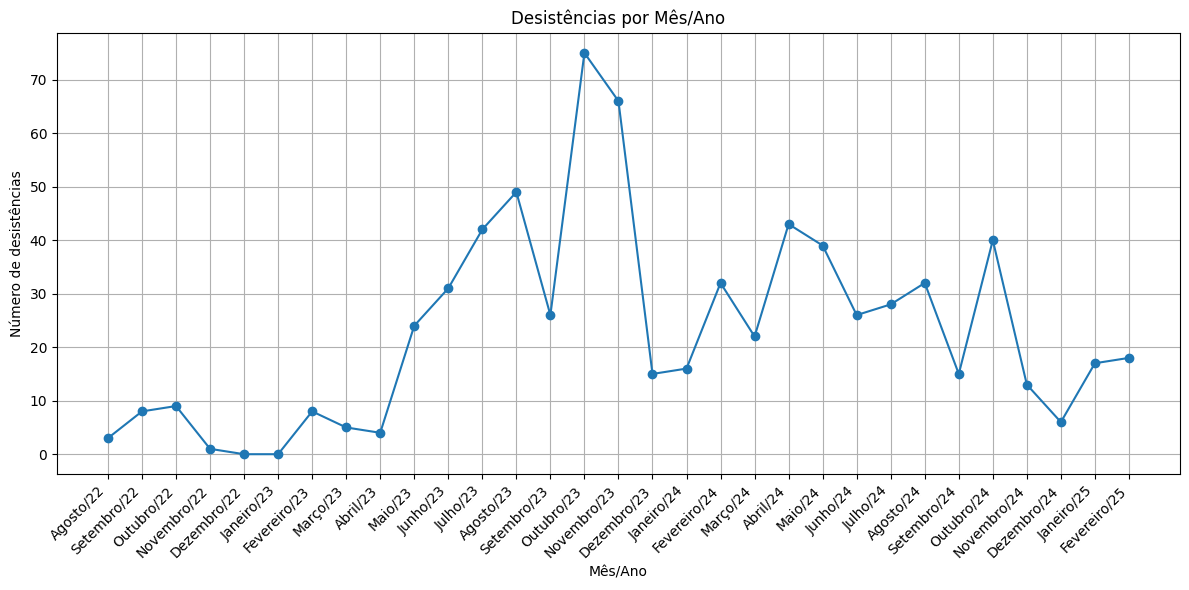

In [40]:
import matplotlib.pyplot as plt

# Plotar gráfico
plt.figure(figsize=(12,6))
plt.plot(df_desistencias.index, df_desistencias['Desistências por Mês/Ano'], marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.xlabel('Mês/Ano')
plt.ylabel('Número de desistências')
plt.title('Desistências por Mês/Ano')
plt.grid(True)
plt.tight_layout()
plt.show()

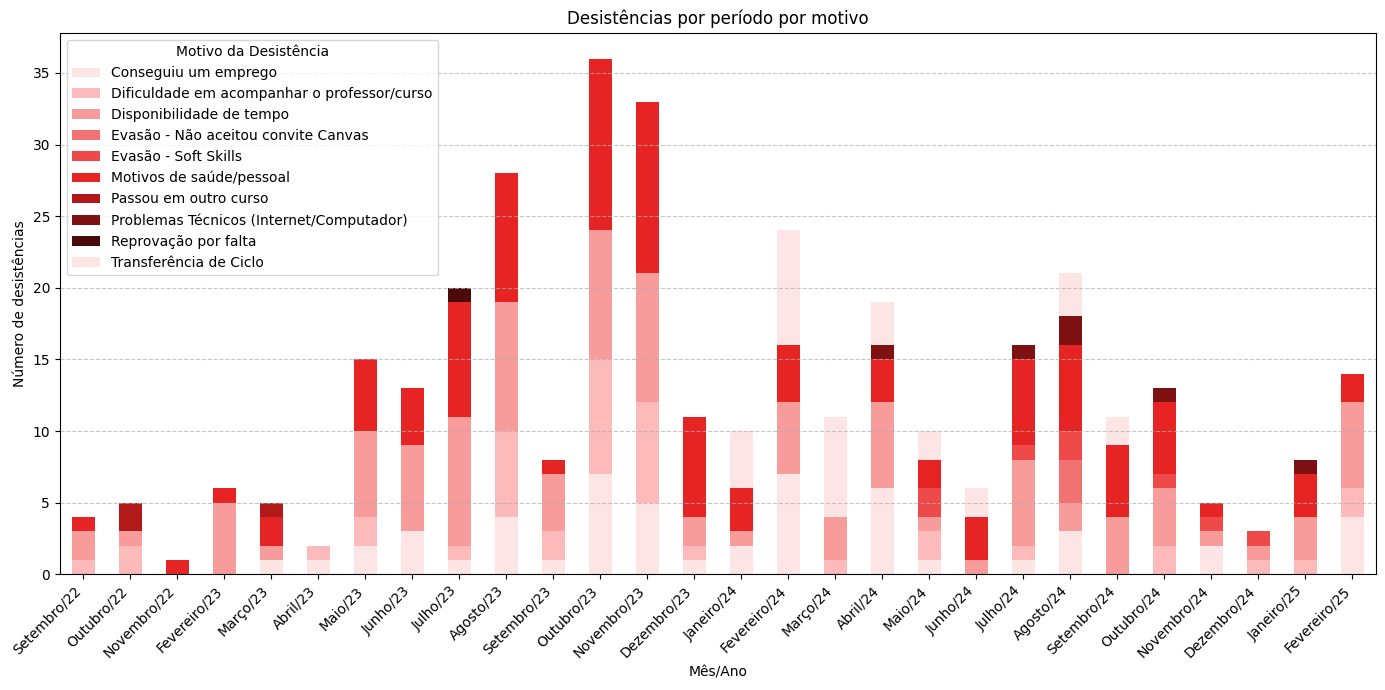


Desistências por motivo
- Conseguiu um emprego: 52
- Dificuldade em acompanhar o professor/curso: 41
- Disponibilidade de tempo: 107
- Evasão - Não aceitou convite Canvas: 3
- Evasão - Soft Skills: 8
- Motivos de saúde/pessoal: 106
- Passou em outro curso: 3
- Problemas Técnicos (Internet/Computador): 6
- Reprovação por falta: 1
- Transferência de Ciclo: 31

Total de desistências por evasão sem justificativa/sem retorno: 355


In [45]:
import matplotlib.pyplot as plt

# Certifique-se que a coluna está como datetime e crie ano_mes como Period
df_selecionado['data_de_desistência_do_curso'] = pd.to_datetime(df_selecionado['data_de_desistência_do_curso'])
df_selecionado['ano_mes'] = df_selecionado['data_de_desistência_do_curso'].dt.to_period('M')

# Corrigir variações nos motivos com acento errado ou pontuação
df_selecionado['motivo_da_desistência'] = df_selecionado['motivo_da_desistência'].replace({
    'Motivos de sáude/pessoal': 'Motivos de saúde/pessoal',
    'Motivos de saúde/pessoal.': 'Motivos de saúde/pessoal'
})

# Agrupar por ano_mes e motivo_da_desistência
pivot = df_selecionado.groupby(['ano_mes', 'motivo_da_desistência']).size().unstack(fill_value=0)

# Completar índice dos meses (garantindo que 2024-10 e 2024-11 estejam inclusos)
min_periodo = min(pivot.index.min(), pd.Period('2024-10', freq='M'))
max_periodo = pivot.index.max()
periodos_completos = pd.period_range(min_periodo, max_periodo, freq='M')
pivot = pivot.reindex(periodos_completos, fill_value=0)

# Tradução explícita dos meses com acento
meses_pt = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
            'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Formatando índice corretamente com mês por extenso e ano abreviado
formatted_index = [
    f"{meses_pt[p.month - 1]}/{str(p.year)[2:]}" for p in pivot.index
]
pivot.index = formatted_index

# Guardar total de "Evasão sem justificativa/sem retorno" para print posterior
evasao_sem_justificativa_total = pivot.get('Evasão sem justificativa/sem retorno', pd.Series([0])).sum()

# Remover essa categoria do pivot para o gráfico
pivot_grafico = pivot.drop(columns=['Evasão sem justificativa/sem retorno'], errors='ignore')

# Remover Dezembro/22 e Janeiro/23 do gráfico
pivot_grafico = pivot_grafico.drop(index=['Agosto/22', 'Dezembro/22', 'Janeiro/23'], errors='ignore')

# Definir paleta tons de vermelho (uma cor para cada motivo)
cores_vermelhas = [
    '#fee5e5',  # vermelho bem claro
    '#fcbaba',
    '#f79b9b',
    '#f27272',
    '#ee4a4a',
    '#e72424',
    '#b21919',
    '#7e1212',
    '#4b0b0b'
]

# Ajustar tamanho da paleta para o número de motivos
num_motivos = len(pivot_grafico.columns)
cores_vermelhas = cores_vermelhas[:num_motivos]

# Plotar gráfico stacked bar com cores vermelhas
pivot_grafico.plot(kind='bar', stacked=True, figsize=(14, 7), color=cores_vermelhas)

plt.xlabel('Mês/Ano')
plt.ylabel('Número de desistências')
plt.title('Desistências por período por motivo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Motivo da Desistência')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Print resumo simples no console ---
print("\nDesistências por motivo")
total_por_motivo = pivot.sum()
for motivo, total in total_por_motivo.items():
    if motivo != 'Evasão sem justificativa/sem retorno':
        print(f"- {motivo}: {total}")

print(f"\nTotal de desistências por evasão sem justificativa/sem retorno: {evasao_sem_justificativa_total}")

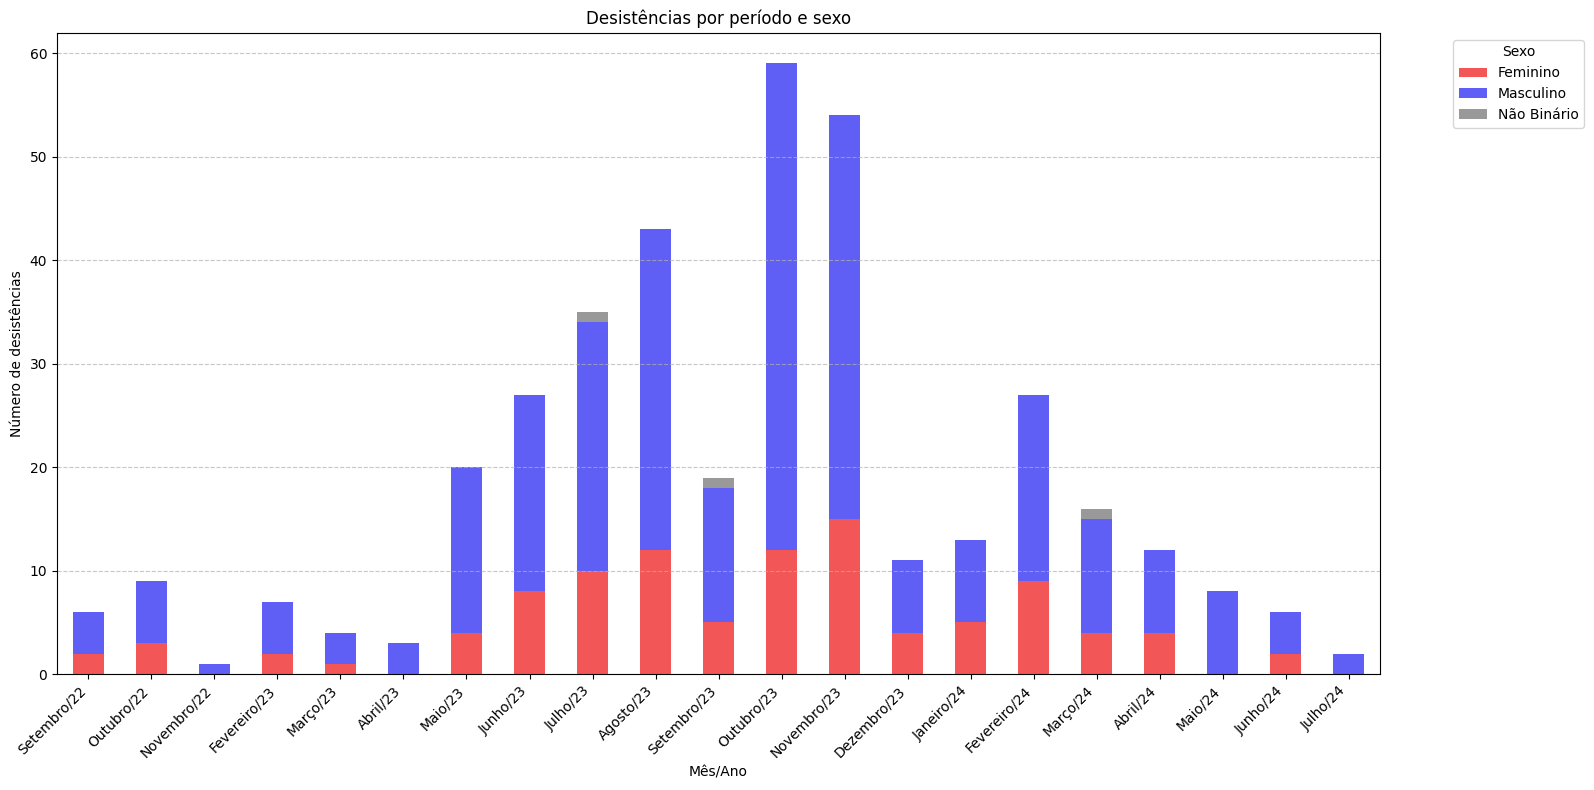

In [42]:
meses_pt = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
            'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

dfs = []
col_names = []

for sexo in df_filtrado['sexo'].dropna().unique():
    df_sexo = df_filtrado[df_filtrado['sexo'] == sexo]

    pivot = df_sexo.groupby('ano_mes').size()

    if pivot.empty:
        continue  # pula se não houver dados para esse sexo

    if not isinstance(pivot.index, pd.PeriodIndex):
        pivot.index = pd.PeriodIndex(pivot.index, freq='M')

    try:
        min_periodo = min(pivot.index.min(), pd.Period('2024-10', freq='M'))
        max_periodo = pivot.index.max()
    except Exception as e:
        print(f"Erro com sexo '{sexo}': {e}")
        continue

    periodos_completos = pd.period_range(min_periodo, max_periodo, freq='M')
    pivot = pivot.reindex(periodos_completos, fill_value=0)

    pivot = pivot.to_frame(name=sexo)

    pivot.index = [f"{meses_pt[p.month - 1]}/{str(p.year)[2:]}" for p in pivot.index]

    dfs.append(pivot)
    col_names.append(sexo)

# Junta os dataframes
df_final = pd.concat(dfs, axis=1).fillna(0)

# Remove meses irrelevantes
meses_remover = ['Agosto/22', 'Dezembro/22', 'Janeiro/23', 'Agosto/24', 'Setembro/24', 'Outubro/24', 'Novembro/24']
df_final = df_final.drop(index=[m for m in meses_remover if m in df_final.index], errors='ignore')

# Cores por sexo
cores_dict = {
    'Feminino': "#f35656",
    'Masculino': "#5f5ff5",
    'Não binário': "#ced6ce"
}

# Plot
df_final.plot(kind='bar', stacked=True, color=[cores_dict.get(c, '#999999') for c in df_final.columns], figsize=(16, 8))

plt.xlabel('Mês/Ano')
plt.ylabel('Número de desistências')
plt.title('Desistências por período e sexo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

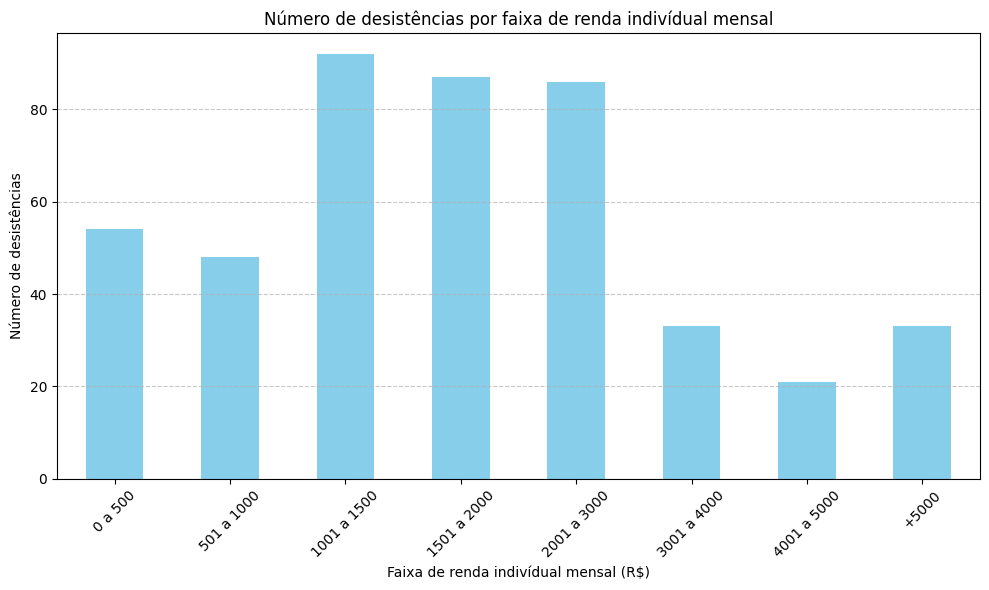

In [43]:
import numpy as np

# Função para limpar o valor monetário no formato 'R$ 3,500.00'
def limpar_renda(valor):
    if pd.isna(valor):
        return np.nan
    valor_str = str(valor).replace('R$', '').replace(' ', '').replace(',', '')
    try:
        return float(valor_str)
    except:
        return np.nan

# Aplicar a limpeza na coluna
df_selecionado['renda_numeric'] = df_selecionado['renda_individual_mensal'].apply(limpar_renda)

# Definir bins e labels
bins = [0, 500, 1000, 1500, 2000, 3000, 4000, 5000, np.inf]
labels = ['0 a 500', '501 a 1000', '1001 a 1500', '1501 a 2000', '2001 a 3000', '3001 a 4000', '4001 a 5000', '+5000']

# Criar faixas
df_selecionado['faixa_renda'] = pd.cut(df_selecionado['renda_numeric'], bins=bins, labels=labels, include_lowest=True)

# Filtrar apenas os alunos desistentes (assumindo que motivo_da_desistência != NaN indica desistência)
df_desistentes = df_selecionado[df_selecionado['motivo_da_desistência'].notna()]

# Contar quantos em cada faixa
contagem_faixa = df_desistentes['faixa_renda'].value_counts().sort_index()

# Plotar gráfico
plt.figure(figsize=(10,6))
contagem_faixa.plot(kind='bar', color='skyblue')
plt.title('Número de desistências por faixa de renda indivídual mensal')
plt.xlabel('Faixa de renda indivídual mensal (R$)')
plt.ylabel('Número de desistências')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

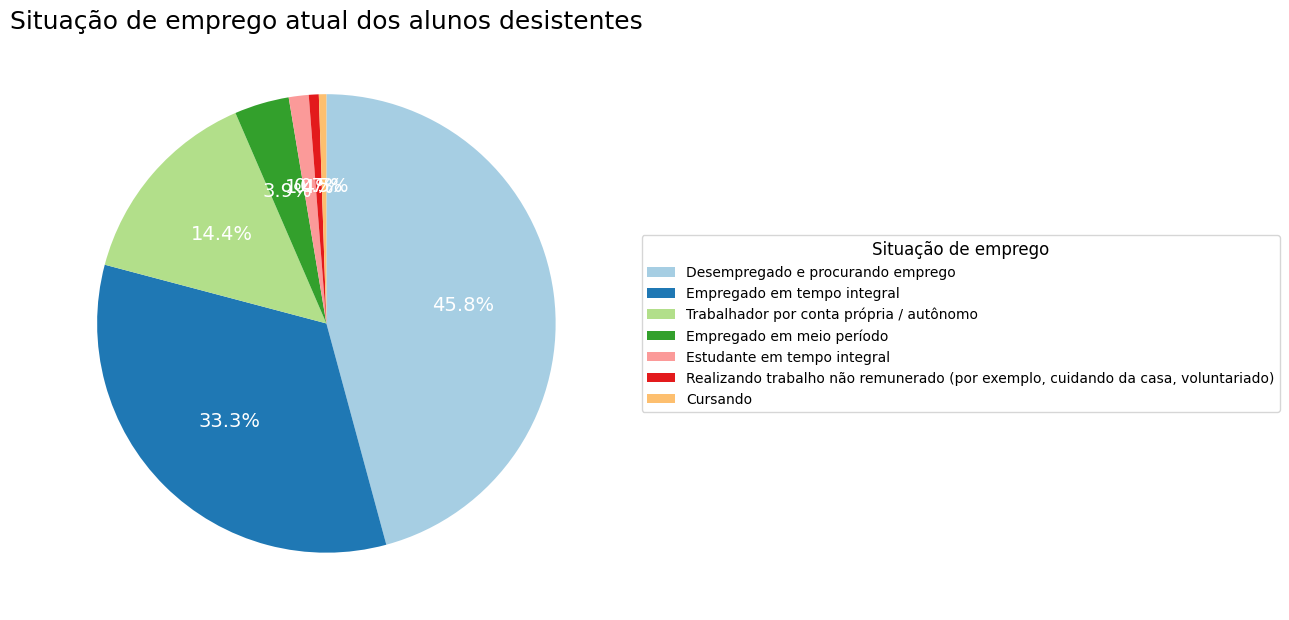

In [44]:
# Filtrar desistentes
df_desistentes = df_selecionado[df_selecionado['motivo_da_desistência'].notna()]

# Remover NaN, vazios e 'Concluído' da coluna 'situação_de_emprego_atual'
emprego_validos = df_desistentes['situação_de_emprego_atual'].dropna()
emprego_validos = emprego_validos[emprego_validos.str.strip() != '']
emprego_validos = emprego_validos[emprego_validos.str.strip().str.lower() != 'concluído']

# Contar frequências
contagem_emprego = emprego_validos.value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(12, 10))
patches, texts, autotexts = plt.pie(
    contagem_emprego, autopct='%1.1f%%', startangle=90, counterclock=False,
    colors=plt.cm.Paired.colors, textprops={'fontsize': 14}
)

# Configurar texto interno da pizza
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

# Legenda menor, compacta do lado direito
plt.legend(
    patches, contagem_emprego.index, title="Situação de emprego", fontsize=10,
    title_fontsize=12, bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0
)

plt.title('Situação de emprego atual dos alunos desistentes', fontsize=18)
plt.tight_layout()
plt.show()

In [25]:
pivot_emprego = df_selecionado.groupby(['ano_mes', 'situação_de_emprego_atual']).size().unstack(fill_value=0)
pivot_emprego = pivot_emprego.reindex(periodos_completos, fill_value=0)
pivot_emprego.index = formatted_index
pivot_emprego = pivot_emprego.drop(index=['Agosto/22', 'Dezembro/22', 'Janeiro/23'], errors='ignore')

pivot_emprego.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de desistências')
plt.title('Desistências por período por situação de emprego atual')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Situação de emprego')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TypeError: no numeric data to plot